# Handwritten Letter Classifier

## Step 1: Install ```emnist``` Python package

In [1]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Step 2: Load the Dataset

In [2]:
import idx2numpy
import numpy as np

# Load training data
x_train = idx2numpy.convert_from_file('emnist-letters-train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('emnist-letters-train-labels-idx1-ubyte')

# Load testing data
x_test = idx2numpy.convert_from_file('emnist-letters-test-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('emnist-letters-test-labels-idx1-ubyte')

# Rotate and Flip EMNIST images
x_train = np.rot90(x_train, k=1, axes=(1,2))
x_test - np.rot90(x_test, k=1, axes=(1,2))

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Labels 1-26 to 0-25
y_train = y_train - 1
y_test = y_test - 1

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Train data shape: (124800, 28, 28, 1)
Test data shape: (20800, 28, 28, 1)


## Step 3: Test a Sample Image

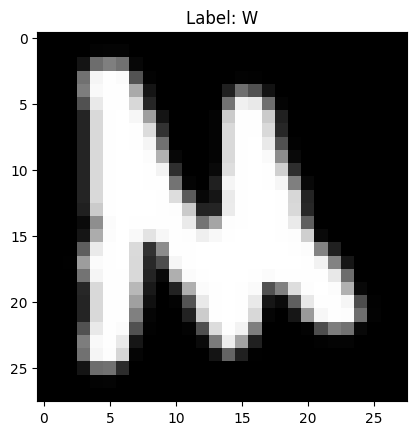

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {chr(y_train[0] + 65)}")
plt.show()

## Step 4: Train a CNN

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.05,
    height_shift_range=0.05
)

datagen.fit(x_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=30, 
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

model.save('letter_model.keras')

C:\Users\Daniel Lai\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\Daniel Lai\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 70s 69ms/step - accuracy: 0.7476 - loss: 0.8283 - val_accuracy: 0.0952 - val_loss: 7.9366
Epoch 2/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8831 - loss: 0.3669 - val_accuracy: 0.1133 - val_loss: 7.7480
Epoch 3/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.9053 - loss: 0.2946 - val_accuracy: 0.1188 - val_loss: 7.9674
Epoch 4/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.9154 - loss: 0.2597 - val_accuracy: 0.1240 - val_loss: 8.3206
Epoch 5/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 52s 54ms/step - accuracy: 0.9223 - loss: 0.2381 - val_accuracy: 0.1179 - val_loss: 8.2011
Epoch 6/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9274 - loss: 0.2194 - val_accuracy: 0.1225 - val_loss: 8.6947
Epoch 7/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9307 - loss: 0.2075 - val_accuracy: 0.1356 - val_loss: 8.8852
Epoch 8/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9335 - loss: 0.1965 - val_accurac

## Step 5: Plot Accuracy and Validation Loss

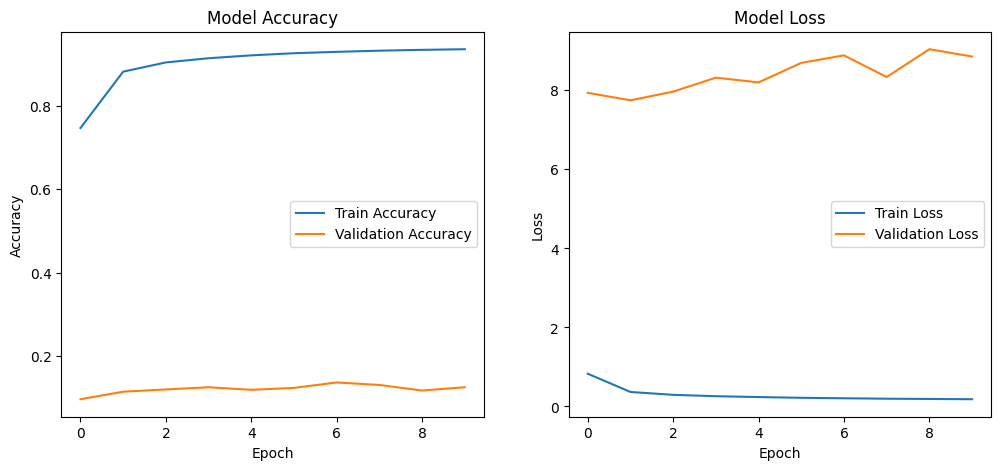

In [5]:
# Accuracy plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Validation loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()